# SVMで訓練するプログラム
## データ均一+tfidfで特徴語としたデータのみにする

### 必要なライブラリのインポート

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from gensim import matutils
from gensim import corpora
import pickle
import sys
import glob
sys.path.append('../')
from util import util

### 定数宣言

In [2]:
ROOT_DIR = '.'
DATA_PATH = '/text'
TF_IDF_NUM = 0.1
FALSE_DATA_PATH = '/false-equalized-tfidf-'+str(TF_IDF_NUM)
DICTIONARY_PATH = '/Dictionary'
DICTIONARY_NAME = '/tf-idf-'+str(TF_IDF_NUM)+'-dictionary.txt'
TFIDF_WORD_LIST = '/tfidf_word_list.pkl'
TFIDF_PATH = '/tfidf/tf-idf-'+str(TF_IDF_NUM)+"/*"

### ベクトルを１次元配列に変換するメソッド定義

In [3]:
def vec2dense(vec, num_terms):
    return list(matutils.corpus2dense([vec], num_terms=num_terms).T[0])

### 保存してたtfidf値で圧縮済みの文章リストを読み込む

In [4]:
word_list = []
for path in glob.glob(ROOT_DIR+ROOT_DIR+TFIDF_PATH+TFIDF_WORD_LIST, recursive=True):
    with open(path, "rb") as f:
        words = pickle.load(f)
        word_list.append({'label': path.split("/")[-2], 'words': words})

### 各フォルダのファイル数を確認

In [5]:
for words in word_list:
    print(len(words['words']))

869
870
864
770
511
843
900
870
870


### データ数の均一化を図る
今回は最小数のデータ数に合わせるのでキリ良く500としてみる

In [6]:
util.data_equalization(word_list, 500)

movie-enter 500
it-life-hack 500
kaden-channel 500
topic-news 500
livedoor-homme 500
peachy 500
sports-watch 500
dokujo-tsushin 500
smax 500


### word_listをラベル、文書、ファイル名に分ける

In [7]:
label = util.get_path_list(ROOT_DIR+ROOT_DIR+DATA_PATH)
util.devide_word_list(word_list, label)

movie-enter [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### 保存してた辞書を読み込む
warning出るけど、古いよってやつだからとりあえずシカト（でも毎回出るのはウザいな）

In [8]:
dictionary = corpora.Dictionary.load_from_text(ROOT_DIR+ROOT_DIR+DICTIONARY_PATH+DICTIONARY_NAME)

/usr/local/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### ちなみにword_listの中身はこんな感じ

今回は単語の重複を許してみた\
故にtfidfの値を元に単語を削除し、単語の頻出度がさらに強調された文章ベクトルになる

In [9]:
print(word_list[0]['label'],word_list[0]['words'][0]['text'])

movie-enter ['機能', '性', 'メガネ', 'ダーク', 'ナイト', 'ダーク', 'ナイト', 'ライジング', '7', '月', 'する', 'する', '眼鏡', '市場', 'する', 'メガネ', 'する', 'する', 'する', 'メガネ', '5', 'フレーム', '眼鏡', '市場', '6', '月', 'する', 'する', 'ディテール', '何', '度', '眼鏡', '市場', 'メガネ', 'フレーム', '成型', 'する', '際', '採用', 'する', '成型', '採用', 'バット', 'する', 'する', 'バット', 'する', 'ディテール', '機能', '性', 'する', 'する', 'メガネ', '機能', 'メガネ', 'する', '眼鏡', '市場', '配布', 'する', '配布', 'する', 'する', 'ダーク', 'ナイト', 'ライジング', 'フレーム', '-', 'ダーク', 'ナイト', 'ライジング', '-', 'ダーク', 'ナイト', 'ライジング', '-', 'ダーク', 'ナイト', 'ダーク', 'ナイト', 'ライジング', 'する', 'ダーク', 'ナイト']


### 辞書の大きさの１次元配列を文章毎に作成する
http://kento1109.hatenablog.com/entry/2017/11/15/230909 \
https://qiita.com/hyo_07/items/ba3d53868b2f55ed9941
       

In [10]:
#data_all = [vec2dense(dictionary.doc2bow(data_all[i]),len(dictionary)) for i in range(len(data_all))]
for words in word_list:
    for word in words['words']:
        word['text'] = vec2dense(dictionary.doc2bow(word['text']), len(dictionary))

### １つの文章が以下のようなベクトルになる
頻出度をベクトルにした感じかな。まぁBoWだからそうか。\
TF-IDFをベクトルにしたものの方が割りかしいいかも\
後、頻出しないものは0って固定されてるのもいいのかな？＝＞単純に0がいいのか不明。少なくともword2vecのベクトルだとこれとは違うがマイナスとかの概念があって、それによって距離感とか上手く表現出来てる？（作成者も多分わかってない笑）
下記の標準化とは違うと思う

In [11]:
print(word_list[0]['words'][0])

{'text': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 

### データを分ける
test_size ・・・　割り合い決める0.1か0.2がいいかな\
random_state　・・・　データ分割のランダム化を制御する値。詳しくは不明だが、これをNoneにするとランダムになり、実行の度にデータが変化する。（割合はtest_sizeに準ずる）つまりは分割する場所がランダムになる。\
shuffle　・・・　データをシャッフルするか\
返り値は名前の通り


今回はラベル毎に9:1の割合で分ける。これによりラベル毎の偏りをなくす

In [12]:
X_train = []
X_test = []
y_train = []
y_test = []

for words in word_list:
    x_tr, x_te, y_tr, y_te = train_test_split(words['words'], words['labels'], test_size=0.1, random_state=1, shuffle=True)
    X_train.extend(x_tr)
    X_test.extend(x_te)
    y_train.extend(y_tr)
    y_test.extend(y_te)

print('X_train',len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))
#X_train, X_test, y_train, y_test = train_test_split(data_all, labels, test_size=0.1, random_state=1, shuffle=True)

X_train 4050
X_test 450
y_train 4050
y_test 450


### データを1次元配列に戻す

In [13]:
train_file_name = [data['file'] for data in X_train]
X_train = [data['text'] for data in X_train]
test_file_name = [data['file'] for data in X_test]
X_test = [data['text'] for data in X_test]

### データ標準化
色々説明必要だけど長いから参照: http://ailaby.com/scaler/ \
ここでのfitは学習ではなく、平均0,分散1にしてるみたいです。\
参照: http://learning.ikeay.net/entry/2016/07/19/140930

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
print(X_train_std[0])

[10.18722667  7.1567833  -0.18162429 -0.19336416 -0.17582645 -0.14473478
 -0.19245009 -0.20984763 -0.24157359 -0.26065132 -0.21256161 -0.31896254
 -0.13257172 -0.12397253 -0.0906458  -0.10935601 -0.21259258  1.44689528
 -0.27992109 -0.09155803 -0.10946231 -0.12302265 -0.15561475 -0.14568144
 -0.16068692 -0.17138546 -0.18824068 -0.10042775  2.20727762 -0.12099686
 -0.16401491 -0.25753582 -0.20129287 -0.12923224 -0.1088927  -0.13024857
 -0.32741024 -0.10751636  1.73292153 -0.1026606  -0.26356341 -0.0967572
 -0.14308609  2.34145944  4.08795023 -0.30221295  1.44574948 -0.11498189
 -0.16902851 -0.13790906 -0.18869038 -0.17988531 -0.09310966 -0.21605098
 -0.09833547 -0.10606583  1.94972374 -0.12917344 -0.18380187 -0.15646362
 -0.24525529 -0.14369884  5.1293502  -0.25081087 -0.14156174  4.28730472
 -0.10173695 -0.29256575 -0.10289365 -0.10299339 -0.11080753  2.57062489
 -0.16536004 -0.11532901 -0.10420576 -0.09068631 -0.11576092 -0.16082887
 -0.1044414  -0.12122688 -0.10662078 -0.12060454 -0.

### モデル作成
https://www.sejuku.net/blog/64372

In [18]:
clf = SVC(C = 100, kernel = 'rbf')
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### モデル評価

In [19]:
score = clf.score(X_test, y_test)
print("{:.3g}".format(score))

0.527


### 標準化の効果
標準化すると単純に精度が上がる可能性がある。詳しくは標準化を調べればわかるかも

In [20]:
clf = SVC(C = 100, kernel = 'rbf')
clf.fit(X_train_std, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
score = clf.score(X_test_std, y_test)
print("{:.3g}".format(score))

0.487


### どれだけ何があってたか可視化
http://looseleaf0727.hatenablog.jp/entry/2017/12/04/234813

#### 正解と不正解の分類

<table>
    <tr>
        <th> </th>
        <th>True(正解)</th>
        <th>False(不正解)</th>
    </tr>
    <tr>
        <th>True(予想結果)</th>
        <td>TP</td>
        <td>FP</td>
    </tr>
    <tr>
        <th>False(予測結果)</th>
        <td>FN</td>
        <td>TN</td>
   </tr>
        
</table>

<ul>
   <li>
        $$accuracy(精度) = \frac{TP + TN}{TP + FP + TN +  FN}$$
   </li>
   <li>
        $$precision(適合率) = \frac{TP}{TP + FP}$$
   </li>
   
   <li>
        $$recall(再現率) = \frac{TP}{TP+FN}$$
   </li>
   <li>
        $$f1-score(F-値) = 2\frac{Precision * Recall}{Precision+Recall}$$ 
   </li>
   <li>
        support ・・・　検証データ数
   </li>
    
</ul>

https://blog.amedama.jp/entry/2017/12/18/005311

In [47]:
from sklearn.metrics import classification_report
predict = clf.predict(X_test_std)
label = util.get_path_list(ROOT_DIR+ROOT_DIR+DATA_PATH)
for i, l in enumerate(label):
    print(i, l)
print(classification_report(y_test, predict, target_names=label))
    

0 movie-enter
1 it-life-hack
2 kaden-channel
3 topic-news
4 livedoor-homme
5 peachy
6 sports-watch
7 dokujo-tsushin
8 smax
                precision    recall  f1-score   support

   movie-enter       0.68      0.42      0.52        50
  it-life-hack       0.37      0.66      0.47        50
 kaden-channel       0.52      0.54      0.53        50
    topic-news       0.39      0.64      0.48        50
livedoor-homme       0.67      0.36      0.47        50
        peachy       0.55      0.46      0.50        50
  sports-watch       0.76      0.62      0.68        50
dokujo-tsushin       0.50      0.48      0.49        50
          smax       0.83      0.60      0.70        50

     micro avg       0.53      0.53      0.53       450
     macro avg       0.58      0.53      0.54       450
  weighted avg       0.58      0.53      0.54       450



### クラス毎の対比

In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predict)

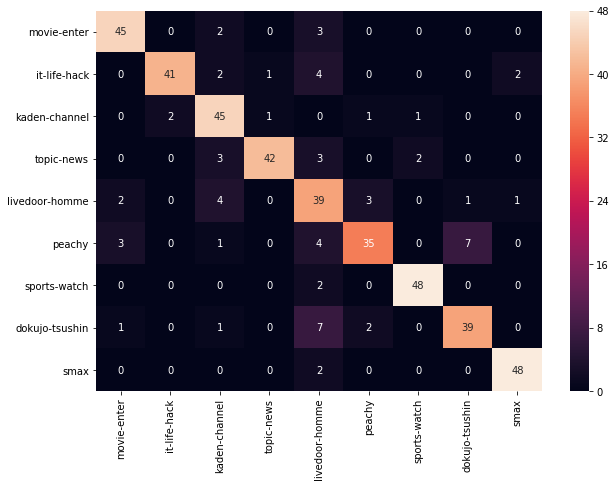

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, index=label, columns = label)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True)

### 結果
結構まばらな結果になった

### 実際、どんな文章を間違えて分類してしまったか見る

### 不正解フォルダを作成し、そこに予想したカテゴリ毎にフォルダを作成し、そこに正解データを入れていく
予想したカテゴリ内に実際の答えがある感じ\
フォルダのファイルを実際に見たり、TF-IDFで特徴語を抽出して、何の単語で誤判定をしてしまったかを考察出来る
#### 不正解フォルダはモデルのハイパーパラメータとかで分類して学習毎にフォルダは分けないと結果が混ざってしまう(モデルのハイパーパラメータの理解と重要なパラメータの把握が。。。)

In [43]:
import shutil,os
for i, pred in enumerate(predict):
    if not y_test[i] == pred:
        srcPath = ROOT_DIR+ROOT_DIR+DATA_PATH+"/"+label[y_test[i]]
        destPath = ROOT_DIR+FALSE_DATA_PATH
        if not os.path.isdir(destPath):
            os.mkdir(destPath)
        destPath = ROOT_DIR+FALSE_DATA_PATH + "/" + label[pred]
        if not os.path.isdir(destPath):
            os.mkdir(destPath)
        shutil.copyfile(srcPath+"/"+test_file_name[i]+".txt"
                        , destPath+"/"+label[y_test[i]]+"_"+test_file_name[i]+".txt")